# Flowers Classification with Artificial Neural Network


## What is a Convolutional Neural Network?
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

You can read more at [**A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way**](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)




![](https://raw.githubusercontent.com/aravind-naidu/Image-Classification/main/cnn_arch.jpeg)

# Dataset
This is a simple yet excellent dataset for beginner programmers to learn image classification. It contains images of sunflower, lotus ,and rose split into training and validation set. We need to classify these three flower classes and make a classifier out of our model which can predict results accurately on unseen data.

You can download the data from: 
[Flowers Classification Dataset | Kaggle](https://www.kaggle.com/ayaanmustafa/flower)



## Importing important libraries


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator

# The folder location of the dataset

folder = 'Flower Classification/flower_images/'

## Getting the different class labels

In [ ]:
labels = os.listdir(folder + 'training')
print(labels)

['sunflower', 'rose', 'lotus']


## Walking through training directory

In [ ]:
num = []
for label in labels:
    path = (folder + 'training/{0}/'.format(label))
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 SUNFLOWER
there are  126  images in  sunflower class

 ROSE
there are  75  images in  rose class

 LOTUS
there are  71  images in  lotus class


## Plotting graph for classes

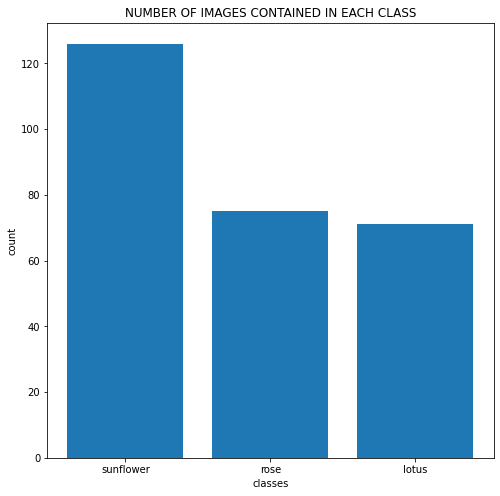

In [ ]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

## Creating Training set

In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = ( folder + 'training/{0}/'.format(label))
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (150,150))
        x_data.append(np.array(image_resized))
        y_data.append(label)

## Visualizing the data

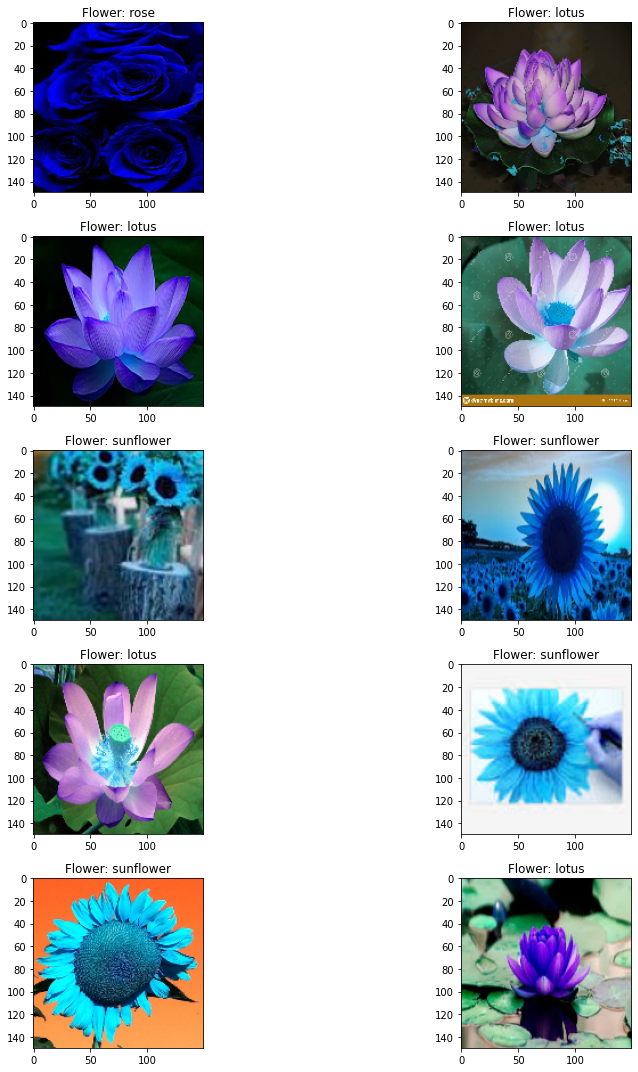

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('Flower: '+y_data[l])
        
plt.tight_layout()

In [ ]:
x_data = np.array(x_data)

y_data = np.array(y_data)

print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (272, 150, 150, 3) and that of Y is:  (272,)


## Handling categorical labels

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(y_data)
Y=to_categorical(Y,3)
x_data = x_data/255   #standarization

In [ ]:
Y.shape

(272, 3)

## Create the model

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

## Compiling the model

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1440000)           0         
_________________________________________________________________
dense (Dense)                (None, 256)               368640256 
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

## Creating Validation set

In [ ]:
test_label = os.listdir(folder + 'validation')
print(test_label)

['sunflower_val', 'rose_val', 'lotus_val']


In [ ]:
x_test =[]
y_test = []

for label in test_label:
    path = (folder + 'validation/{0}/'.format(label))
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (150,150))
        x_test.append(np.array(image_resized))
        y_test.append(label)

In [ ]:
x_test = np.array(x_test)
x_test = x_test/255
y_test = np.array(y_test)
le = LabelEncoder()
y = le.fit_transform(y_test)
y = to_categorical(y,3)

In [ ]:
x_test.shape,y.shape

((59, 150, 150, 3), (59, 3))

## Regularization

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [ ]:
History = model.fit(x_data,Y,epochs = 100, validation_data = (x_test,y),
                    verbose = 1,callbacks=[early_stop])


Epoch 1/100
9/9 [==============================] - 9s 217ms/step - loss: 28.5931 - acc: 0.3583 - val_loss: 3.4179 - val_acc: 0.5254
Epoch 2/100
9/9 [==============================] - 1s 140ms/step - loss: 1.7906 - acc: 0.5851 - val_loss: 0.5080 - val_acc: 0.9153
Epoch 3/100
9/9 [==============================] - 1s 141ms/step - loss: 0.4373 - acc: 0.9456 - val_loss: 0.1936 - val_acc: 0.9322
Epoch 4/100
9/9 [==============================] - 1s 140ms/step - loss: 0.1720 - acc: 0.9233 - val_loss: 0.4795 - val_acc: 0.8305
Epoch 5/100
9/9 [==============================] - 1s 140ms/step - loss: 0.1400 - acc: 0.9542 - val_loss: 0.4803 - val_acc: 0.8814
Epoch 6/100
9/9 [==============================] - 1s 141ms/step - loss: 0.0476 - acc: 0.9896 - val_loss: 0.3646 - val_acc: 0.9153
Epoch 7/100
9/9 [==============================] - 1s 140ms/step - loss: 0.0233 - acc: 0.9989 - val_loss: 0.3865 - val_acc: 0.9661
Epoch 8/100
9/9 [==============================] - 1s 141ms/step - loss: 0.0194 - 

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_data)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
         width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(x_test)

In [ ]:
History = model.fit_generator(datagen.flow(x_data,Y, batch_size=32),
                              epochs = 100, validation_data = val_datagen.flow(x_test,y,batch_size=32),
                              verbose = 1, steps_per_epoch=x_data.shape[0] // 32,
                              callbacks=[early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
8/8 [==============================] - 2s 287ms/step - loss: 12.0394 - acc: 0.7208 - val_loss: 4.1330 - val_acc: 0.8644
Epoch 2/100
8/8 [==============================] - 2s 238ms/step - loss: 0.8026 - acc: 0.9219 - val_loss: 1.9000 - val_acc: 0.9322
Epoch 3/100
8/8 [==============================] - 2s 236ms/step - loss: 0.2189 - acc: 0.9333 - val_loss: 0.6995 - val_acc: 0.8475
Epoch 4/100
8/8 [==============================] - 2s 239ms/step - loss: 0.2094 - acc: 0.9625 - val_loss: 0.3168 - val_acc: 0.8644
Epoch 5/100
8/8 [==============================] - 2s 237ms/step - loss: 0.1260 - acc: 0.9625 - val_loss: 0.6945 - val_acc: 0.9153
Epoch 6/100
8/8 [==============================] - 2s 246ms/step - loss: 0.1233 - acc: 0.9609 - val_loss: 0.0439 - val_acc: 0.9831
Epoch 7/100
8/8 [==============================] - 2s 237ms/step - loss: 0.0478 - acc: 0.9875 - val_loss: 0.3464 - val_acc: 0.9322
Epoch 8/100
8/8 [==============================] - 2s 241ms/step - loss: 0.0404 - 

## Visualizing Model Loss and Accuracy

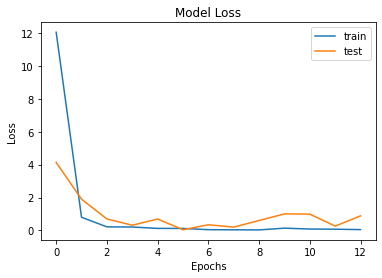

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

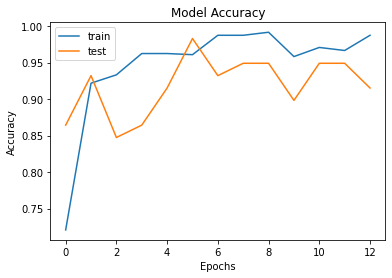

In [ ]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# model.save('flower_classification.h5')